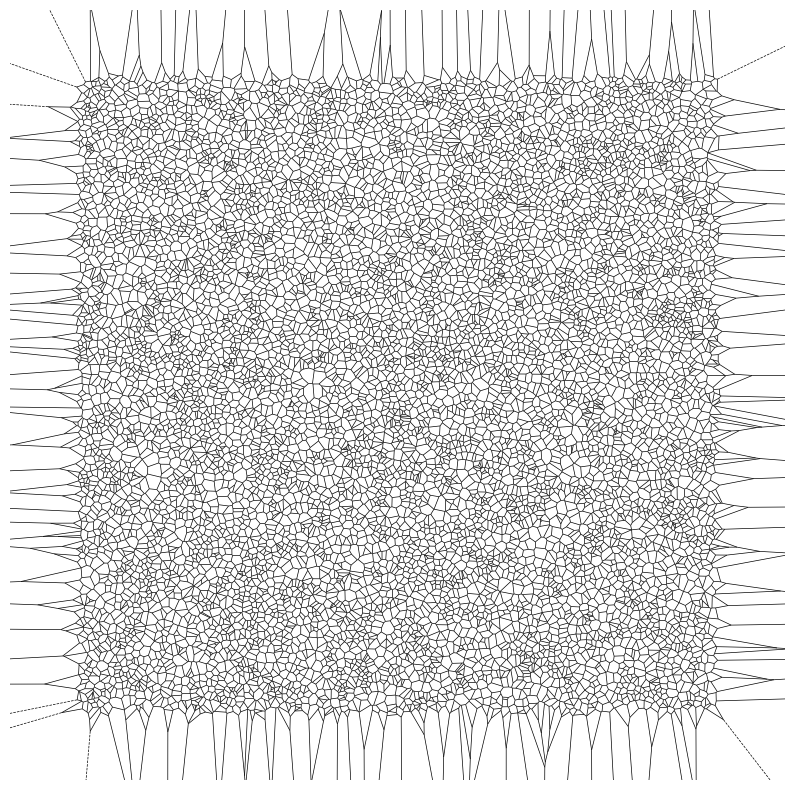

In [189]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt
from shapely.geometry import Polygon

#Let us generate a few random coordinates
coords = np.random.rand(10000, 2)
vor = Voronoi(coords)

fig, ax = plt.subplots(figsize = [10,10])

fig = voronoi_plot_2d(vor, ax=ax, point_size = 0, show_vertices = False, line_width = 0.5)

#ax.set_xlim([0,1])
#ax.set_ylim([0,1])
ax.set_axis_off()
#plt.savefig('voronoi.png', dpi = 700, bbox_inches = 'tight')

In [190]:
'''from scipy.optimize import curve_fit

fig, ax = plt.subplots()
ax.set_xlim([0,0.001])
def log_norm(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
counts, bins, _ = ax.hist(area, bins=500, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
log_norm_points = log_norm(bin_centers, *popt)
ax.plot(bin_centers, log_norm_points , color='red', label='Fitted curve', linewidth = 2.5)'''

"from scipy.optimize import curve_fit\n\nfig, ax = plt.subplots()\nax.set_xlim([0,0.001])\ndef log_norm(x, mu, sigma):\n    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))\ncounts, bins, _ = ax.hist(area, bins=500, density=True)\nbin_centers = (bins[1:] + bins[:-1]) / 2\npopt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])\nlog_norm_points = log_norm(bin_centers, *popt)\nax.plot(bin_centers, log_norm_points , color='red', label='Fitted curve', linewidth = 2.5)"

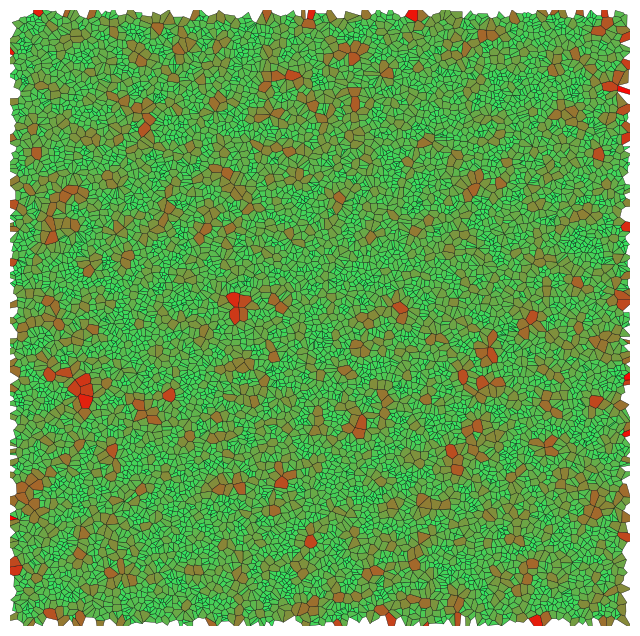

In [191]:
import matplotlib.collections as collections
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.cm as cm
from shapely.geometry import Polygon
import pandas as pd

polygons_coords = [vor.vertices[region] for region in vor.regions if (region and -1 not in region)]
shapely_polygons_areas = [Polygon(coord).area for coord in polygons_coords]

poly_df = pd.DataFrame({ 'Poly_coords' :polygons_coords,'Poly_areas' :shapely_polygons_areas})
poly_df = poly_df[poly_df['Poly_areas'] < 0.0005]

fig, ax = plt.subplots(figsize = [8,8])
ax.set_axis_off()
#ax.set_xlim([-0.1,1.1])
#ax.set_ylim([-0.1,1.1])

# Нормализуем площади для цветовой карты
norm = Normalize(vmin=min(poly_df['Poly_areas']), vmax=max(poly_df['Poly_areas']))
cmap = cm.Wistia
custom_cmap = LinearSegmentedColormap.from_list('custom_gradient', ["#24f767", '#ff0000'])


# Создаем цвета для каждого полигона
colors = [custom_cmap(norm(area)) for area in poly_df['Poly_areas']]
polygons_coll = collections.PolyCollection(
    poly_df['Poly_coords'], 
    facecolors=colors,
    alpha=1,
    edgecolors='black',
    linewidths=0.25
)
ax.add_collection(polygons_coll)
#plt.savefig('cm_voronoi.png', dpi = 700, bbox_inches = 'tight')

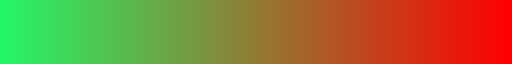

In [192]:
custom_cmap